In [20]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [21]:
env = gym.make('Blackjack-v0')

In [22]:
env.reset()
#player's current sum , dealer's one showing card , player has usable ace

(5, 10, False)

In [4]:
env.action_space
# 0 = stick
# 1 = hit

Discrete(2)

In [23]:
env.step(1)
# next_state, reward, done, info

((15, 10, False), 0.0, False, {})

In [24]:
# cards of the dealer
print("dealer: ", env.dealer)

# cards of the player
print("player: ",env.player)

dealer:  [10, 5]
player:  [2, 3, 10]


In [25]:
env.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [8]:
32*11*2

704

In [26]:
def create_initial_policy():
    # initialize policy with 200 states 
    # player's sum 12-21 * dealer showing 1-10 * usable ace
    # set all actions to hit=1 ...

    policy = np.ones([10, 10, 2])
        
    # ... except when player has 20 or 21, then it is stick
    policy[8:, :, :] = 0
    
    return policy

In [31]:
current_policy = create_initial_policy()

In [32]:
# play a game
observation = env.reset()
done = False

while not done:
    # if player's sum < 12, it should hit
    while observation[0] < 12:
        observation, reward, done, info = env.step(1)
        
    print(observation)    
    action = int(current_policy[observation[0]-12,observation[1]-1,int(observation[2])])
    print(action)
    
    # if action is stick, dealer will be played automatically
    observation, reward, done, info = env.step(action)

print()
print("## end of episode ##")
print("reward: ", reward)
print("dealer: ", env.dealer)
print("player: ",env.player)

        


(20, 5, False)
0

## end of episode ##
reward:  1.0
dealer:  [5, 10, 3]
player:  [4, 4, 2, 10]


In [13]:
''' Monte Carlo prediction '''

' Monte Carlo prediction '

In [14]:
def choose_action(observation):
    if observation[0] < 12:
        action = 1
    else:
        action = int(current_policy[observation[0]-12,observation[1]-1,int(observation[2])])
    return action


In [37]:
# play a game
observation = env.reset()
done = False

while not done:
    action = choose_action(observation)

    # if action is stick, dealer will be played automatically
    observation, reward, done, info = env.step(action)

print()
print("## end of episode ##")
print("reward: ", reward)
print("dealer: ", env.dealer)
print("player: ", env.player)
#print("last obs: ", observation)




## end of episode ##
reward:  0.0
dealer:  [10, 10]
player:  [10, 10]


#monte carlo first visit prediction (policy evaluation)

![pseudo code from page 92 of the text book](MC-prediction.png)


In [38]:
def toState(playersum):
    if playersum < 12:
        return -1
    else:
        return playersum-12

from collections import defaultdict

**implementation of every-visit Monte-Carlo Prediction**

In [39]:
# input: a policy to be evaluated
current_policy = create_initial_policy()

# initialize:
state_values = dict()
## a list of returns, one for each state (as dict)
returns_dict = defaultdict(list)

# a list for the episode is needed
trajectory = list() # SAR S'A'R' S''A''R''
gamma = 1.0


###################################
# loop forever (foreach episode) = 100

for i in range(8000):
    # start environment for the new episode
    observation = env.reset()
    done = False
    trajectory.clear()

    
    # first generate an episode
    while not done:
        action = choose_action(observation)
        current_SA = [ (toState(observation[0]),observation[1]-1,int(observation[2])) , action ]

        # if action is stick, dealer will be played automatically
        observation, reward, done, info = env.step(action)
        current_SA.append(reward)
        trajectory.append( tuple(current_SA) )

    g_return = 0

    # loop backwards in episode
    for step in reversed(trajectory):
        g_return = gamma * g_return + step[2]
        returns_dict[step[0]].append(g_return)
        #print(returns_dict[step[0]])
        state_values[step[0]] = np.mean(returns_dict[step[0]])
    
# end loop forever
###################################

In [20]:
#for entry in state_values.items():
#    print(entry)

In [40]:
# "convert" ungly state values in dict to 1d-array (only without usable ace)

v_matrix = np.zeros(100)

i = 0
for playersum in range(10):
    for dealercard in range (10):
        v_matrix[i] = state_values[(playersum, dealercard, 0)]
        i += 1
        

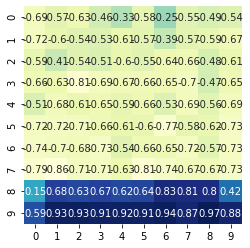

In [41]:
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(v_matrix.reshape(10, 10),  cmap="YlGnBu", annot=True, cbar=False, square=True);

